In [1]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 671 kB/s eta 0:00:01


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
from scipy import stats
from scipy.stats import norm, skew #for some statistics



See The Data

In [3]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**List of continuous and categorical features**

In [6]:
cont_features=[i for i in df.columns if df[i].nunique()>5]
cat_features=[i for i in df.columns if df[i].nunique()<=5]

In [7]:
cont_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [8]:
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Normality Check- Continuous Features:

Test for Normality Of Features(A pre requirement for parametric hypothesis tests):
We check whether our continuous features are normal/not through:
* Boxplots(to check for outliers causing non normality)
* Distplots
* Q-Q PLOTS
* SHAPIRO WILK TEST(tests against the null hypothesis that the distribution is normal)


**AGE**

Boxplot

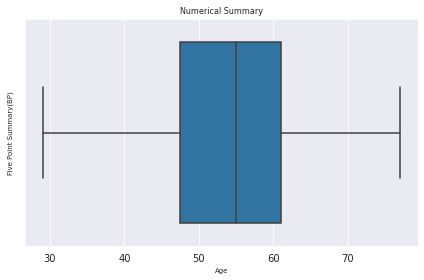

In [9]:
plot10=sns.boxplot(df['age'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':8})
plt.xlabel('Age',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

Distplot and Q-Q plot

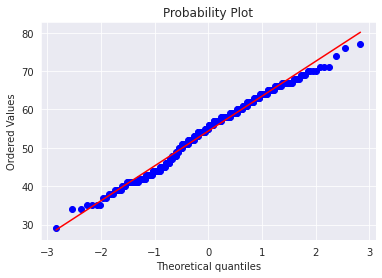

In [10]:
fig = ff.create_distplot([df.age],['age'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)
plt.show()

Shapiro Wilk Test 

In [11]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df['age'])


ShapiroResult(statistic=0.9863710999488831, pvalue=0.005800189916044474)

Since the p value<0.05(significance level),the null hypothesis is rejected and we conclude that the distribution is non normal.

**TRTBPS**

trtbps : resting blood pressure (in mm Hg)

Boxplot and outliers removal

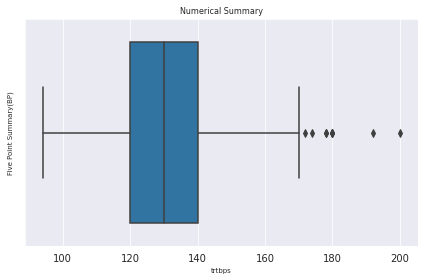

In [12]:
plot10=sns.boxplot(df['trtbps'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':8})
plt.xlabel('trtbps',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()
Q1 = df['trtbps'].quantile(0.25)
Q3 = df['trtbps'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['trtbps'] >= Q1 - 1.5 * IQR) & (df['trtbps'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]  

Distplot and Q-Q plot

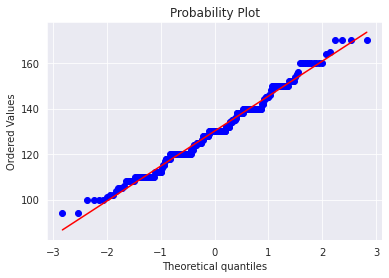

In [13]:
fig = ff.create_distplot([df.trtbps],['trtbps'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['trtbps'], plot=plt)
plt.show()

Shapiro Wilk Test

In [14]:
from scipy.stats import shapiro
import scipy.stats as stats
ntA = shapiro(df1['trtbps'])
ntA

ShapiroResult(statistic=0.9846889972686768, pvalue=0.0031603665556758642)

Since the p value<0.05(significance level),the null hypothesis is rejected and we conclude that the distribution is non normal.

**Thalachh**

max heart rate achieved


Boxplot and Outliers Removal

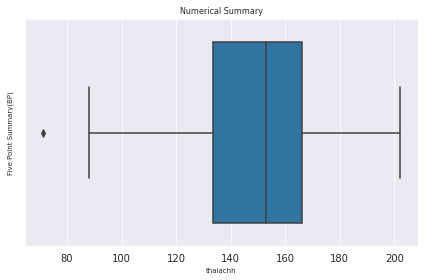

In [15]:
plot10=sns.boxplot(df['thalachh'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':8})
plt.xlabel('thalachh',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()
Q1 = df['thalachh'].quantile(0.25)
Q3 = df['thalachh'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['thalachh'] >= Q1 - 1.5 * IQR) & (df['thalachh'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]  

Distplot and Q-Q plot

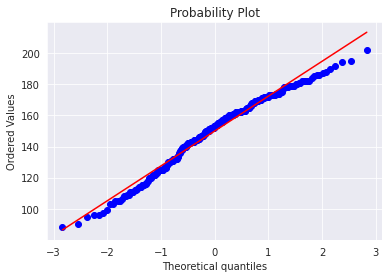

In [16]:
fig = ff.create_distplot([df.thalachh],['thalachh'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['thalachh'], plot=plt)
plt.show()

Shapiro Wilk Test

In [17]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df1['thalachh'])


ShapiroResult(statistic=0.9772896766662598, pvalue=0.00010128477879334241)

Since the p value<0.05(significance level),the null hypothesis is rejected and we conclude that the distribution is non normal.

**Chol**

Cholesterol in mg/dl fetched via BMI sensor

Boxplot

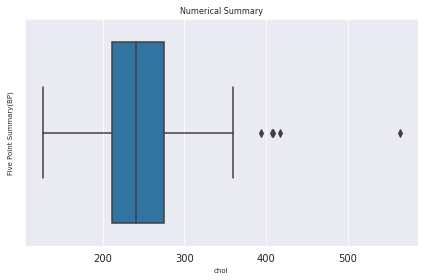

In [18]:

plot10=sns.boxplot(df['chol'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':8})
plt.xlabel('chol',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()


Removing outliers

In [19]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['chol'] >= Q1 - 1.5 * IQR) & (df['chol'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]  

Distplot and Q-Q plot

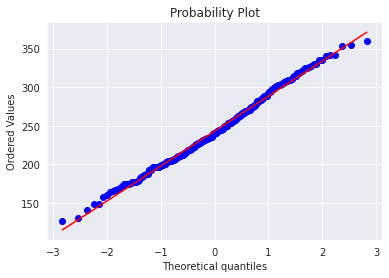

In [20]:
fig = ff.create_distplot([df.chol],['chol'],bin_size=5)
iplot(fig, filename='Basic Distplot')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['chol'], plot=plt)
plt.show()

Shapiro Wilk Test for normality

In [21]:
from scipy.stats import shapiro
from scipy.stats import anderson
import scipy.stats as stats
shapiro(df1['chol'])

ShapiroResult(statistic=0.9930447936058044, pvalue=0.18170516192913055)

Since the p value>0.05(significance level),we fail to reject the null hypothesis and conclude that the distribution is normal.

Anderson-Darling Test for Normality

In [22]:
result = anderson(df['chol'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.726
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)


So,our data is normal

**OLD PEAK**

Distplot and Q-Q plot

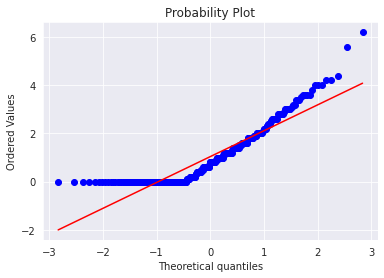

In [23]:
fig = ff.create_distplot([df.oldpeak],['oldpeak'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['oldpeak'], plot=plt)
plt.show()

Shapiro test for normality

In [24]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df['oldpeak'])


ShapiroResult(statistic=0.8441835045814514, pvalue=8.183467206576554e-17)

Since the p value<0.05(significance level),the null hypothesis is rejected and we conclude that the distribution is non normal.

* Out of the 5 continuous features,only **chol**(cholestoral in mg/dl fetched via BMI sensor) has an overall normal distribution.Rest of them show deviations from normality in their distributions as we saw above.So,we will be performing the parametric statistical tests on the chol feature only.
* For the non normal features, we can perform some non parametric statistical test that we will see further.

# **Confidence Intervals**

1.**What proportion of the population has a higher chance of having a heart attack?**

The answer to this question about the entire population has to be given from our data that is a random sample of our population.
* **OUR TASK**:Obtain a 95% confidence interval for the population proportion of people that have higher chances of heart attack.
* What we mean by 95% confidence interval is that “we are confident that in 95% of the samplings, the samples will have the **proportion of people having higher chances of heart attack** that can create the interval which covers the **population proportion of people that have higher chances of heart attack**”

In [25]:
df=df1
df.output.replace({0:'Less chance',1:'More chance'},inplace=True)

print(df.output.value_counts())
n = df.shape[0]
More_chance = df.output.value_counts().loc['More chance']

print("\nTotal Observation ==>",n,"\t","Number of people in our sample data having more chances of heart attack==> ",More_chance,"\n")

More chance    162
Less chance    136
Name: output, dtype: int64

Total Observation ==> 298 	 Number of people in our sample data having more chances of heart attack==>  162 



In [26]:
import statsmodels.api as sm
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(More_chance, n),"\n")


95% Confidence interval with statsmodels library ==> (0.4870718110905944, 0.6001765110570566) 



**Interpretation of the result**:
* With 95% confidence, the population proportion of people having more chances of heart attack is estimated to be between 48.70% - 60.01%.


**2.What is the average cholesterol level for people with more chance of heart attack?**
*  This question has to be answered for the population,so we need to obtain a confidence interval as in the previous question.What is different is the population metric,it was proportion in the previous question and it is mean in this question.The population is also different as now it just contains the people with more chance of heart attack.
* The population:people having more chance of heart attack
* The population metric:average cholesterol level of people having more chance of heart attack

* Our task:To obtain a 95% confidence interval around the **sample average cholesterol level** that will contain the **population average cholesterol level** in 95% of the samplings.

In [27]:
df_more_chance=df[df['output']=='More chance']
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_more_chance['chol']).zconfint_mean())


95% C.I. with statsmodels library ==> (231.46447712295694, 244.99231300049988)


**Interpretation of the result**:
* With 95% confidence, the population average cholestrol level of people having more chances of heart attack is estimated to be between 231.46 and 244.99.

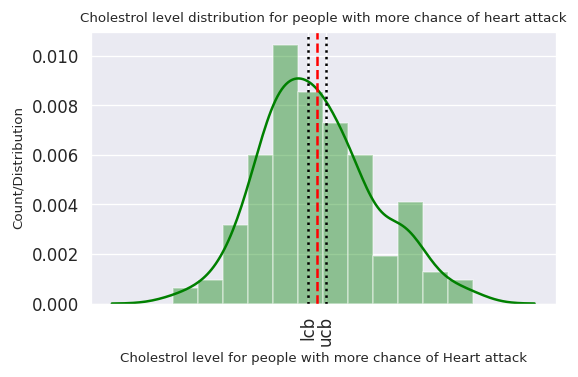

In [28]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_more_chance['chol'],color='green')
plt.axvline(x=231.46447712295694,color = 'black',ls=':')
plt.axvline(x=244.99231300049988,color = 'black',ls=':')
plt.axvline(x=df_more_chance['chol'].mean(),color='red',ls='--')
plt.xticks([231.46447712295694,244.99231300049988],['lcb','ucb'],rotation=90)
plt.xlabel('Cholestrol level for people with more chance of Heart attack',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Cholestrol level distribution for people with more chance of heart attack',fontdict={'fontsize':8}) 
plt.show()

Here 
* LCB =Lower confidence Bound
* UCB =Upper Confidence Bound
* and, the red line denotes the sample average or the **Best Point Estimate**

**3.What is the average cholestrol level for people with less chance of heart attack?**
* The population:people having less chance of heart attack
* The population metric:average cholestrol level of people having less chance of heart attack
* Our task:To obtain a 95% confidence interval around the **sample average cholestrol level** that will contain the **population average cholestrol level** in 95% of the samplings.


In [29]:
df_less_chance=df[df['output']=='Less chance']
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_less_chance['chol']).zconfint_mean())


95% C.I. with statsmodels library ==> (241.05598752555554, 256.5028360038562)


**Interpretation of the result**:
* With 95% confidence, the population average cholestrol level of people having less chances of heart attack is estimated to be between 241.05 and 256.50

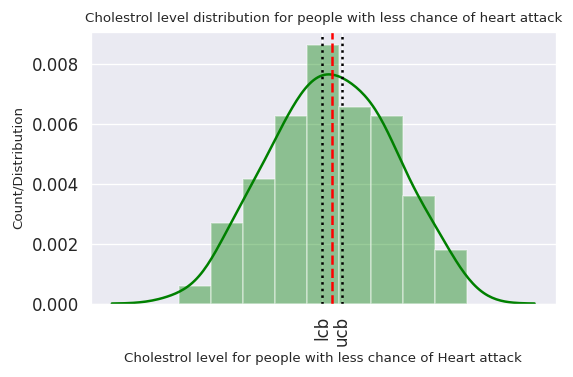

In [30]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_less_chance['chol'],color='green')
plt.axvline(x=241.05598752555554,color = 'black',ls=':')
plt.axvline(x=256.5028360038562,color = 'black',ls=':')
plt.axvline(x=df_less_chance['chol'].mean(),color='red',ls='--')
plt.xticks([241.05598752555554,256.5028360038562],['lcb','ucb'],rotation=90)
plt.xlabel('Cholestrol level for people with less chance of Heart attack',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Cholestrol level distribution for people with less chance of heart attack',fontdict={'fontsize':8}) 
plt.show()

# PARAMETRIC STATISTICAL TEST

**4.Taking the entire population,do people with more chance and less chance of heart attack differ significantly in average cholestrol level?**
* Population:People with more chance of heart attack+people with less chance of heart attack
* Parameter:(μ1 − μ2 ):average cholesterol level difference
* μ1:avg. cholesterol level of people with more chance of heart attack
* μ2:avg. cholesterol level of people with less chance of heart attack

To answer our question,we define a null and an alternate hypothesis,then try to reject the null hypothesis through the statistical test.
* Null:There is no difference in the average cholesterol levels of the two groups
* Alternate:There is a significant difference in the average cholesterol levels of the two group
Significance Level = 5%

Since the group chol feature was normally distributed as we saw earlier ,we can proceed with a parametric statistical test.
We will use the **Independent samples t-test** in this case.
Again,we need to determine which type of **Independent samples t-test** to use:
1. Pooled variance T test:Assumes equal variance of sample groups
2. Welch T test:Takes no assumption of equal variance of sample groups but has higher margin of error than pooled variance hence,should be preferred only when variances aren't equal.

**SO FIRST WE NEED TO CHECK FOR EQUALITY OF VARIANCES TO DECIDE THE TYPE OF T TEST TO USE**


**PLOT**

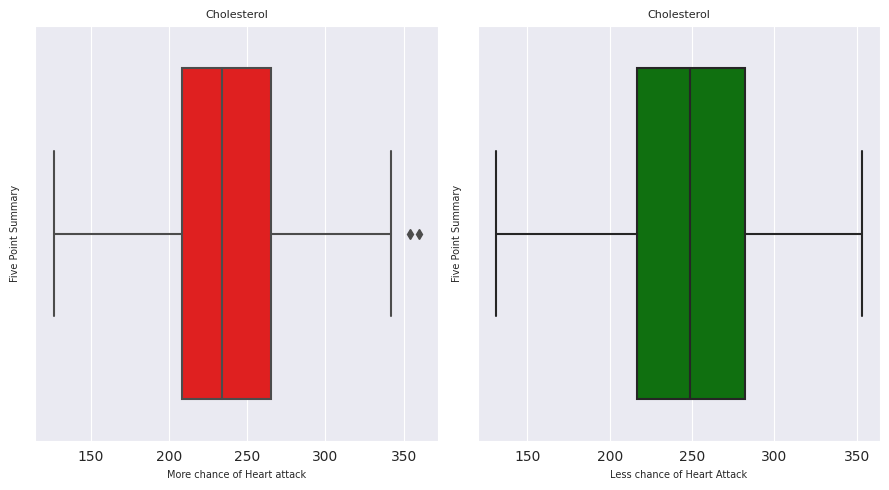

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=100,figsize = (9,5))

plot0 = sns.boxplot(df_more_chance['chol'],ax=axes[0],orient='v',color = 'red')
axes[0].set_title('Cholesterol',fontdict={'fontsize':8})
axes[0].set_xlabel('More chance of Heart attack',fontdict={'fontsize':7})
axes[0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot1 = sns.boxplot(df_less_chance['chol'],ax=axes[1],orient='v',color='green')
axes[1].set_title('Cholesterol',fontdict={'fontsize':8})
axes[1].set_xlabel('Less chance of Heart Attack',fontdict={'fontsize':7})
axes[1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

Variance of both groups are nearly similar or IQR is also almost same. Thus we can proceed with Pooled approach.

**STATISTICAL TEST**

# Levene Test for Equality of Variances

In Levene test,we test the null hypothesis that the population variances are equal/homogenous.

In [32]:
leveneTest = stats.levene(df_more_chance['chol'], df_less_chance['chol'])
leveneTest

LeveneResult(statistic=0.9014261909051294, pvalue=0.3431741118980346)


Here,Levene test gives a p-value>0.05.Hence, we fail to reject the null hypothesis.This implies that the groups show equal variances.
**SO WE CAN PROCEED WITH THE POOLED VARIANCE T-TEST**,that assumes the equal variances of sample groups


# POOLED T TEST

In [33]:
ttest = stats.ttest_ind(df_more_chance['chol'], df_less_chance['chol'], equal_var=True)
ttest

Ttest_indResult(statistic=-2.0222507906656726, pvalue=0.0440496200017402)

* Here,T test gives a p-value<0.05(significance level)implying strong evidence against the null hypothesis.Hence, we reject the null hypothesis.
* We infer that there is a significant difference in the average cholestrol levels of people with more and less chance of heart attack.

To know which group has a higher average cholestrol level,we can obtain a 95% confidence interval around the sample difference in average cholestrol levels(x1-x2) ,such that the confidence interval would contain (μ1 − μ2 ),ie,the population metric in 95% of the samples.

In [34]:
class diffMean:
    import numpy as np
    def __init__(self,x1,x2,std1,std2,n1,n2,t):
        '''t multiplier comes from t distribution with appropriate degree of freedom'''        
        self.best_estimate1 = x1
        self.best_estimate2 = x2
        self.std1 = std1
        self.std2 = std2
        self.n1 = n1
        self.n2 = n2
        self.t = t
        self.pooled_estimated_se = np.sqrt((np.sqrt(((self.n1-1)*(self.std1**2) + (self.n2-1)*(self.std2**2)) / ((self.n1+self.n2)-2))) * (np.sqrt((1/self.n1)+(1/self.n2))))
        self.unpooled_estimated_se = np.sqrt(((self.std1**2)/self.n1) + ((self.std2**2)/self.n2))
        
    def pooledMoe(self):
        return (self.t)*(self.pooled_estimated_se)
    
    def pooledMean(self):
        lcb = (self.best_estimate1 - self.best_estimate2) - self.pooledMoe()
        ucb = (self.best_estimate1 - self.best_estimate2) + self.pooledMoe()
        return (lcb,ucb)

In [35]:
x1 = df_more_chance.chol.mean()
x2 = df_less_chance.chol.mean()
std1 = df_more_chance.chol.std()
std2 = df_less_chance.chol.std()
n1 = df_more_chance.shape[0]
n2 = df_less_chance.shape[0]
mean_diff_chol = diffMean(x1,x2,std1,std2,n1,n2,1.98)
print("\n95% Confidence Interval for (μ1 − μ2 ): Average cholestrol level difference ==> ",mean_diff_chol.pooledMean(),"\n")


95% Confidence Interval for (μ1 − μ2 ): Average cholestrol level difference ==>  (-15.073686060587013, -6.028347345367942) 



So we get a negative LOWER CONFIDENCE and UPPER CONFIDENCE bound,implying μ1< μ2,i.e.,avg. cholestrol level of people with more chance of heart attack is less than avg. cholestrol level of people with less chance of heart attack.

# NON-PARAMETRIC STATISTICAL TEST

5.**Taking the entire population,do people with more chance and less chance of heart attack differ significantly in average age?**
* Population:People with more chance of heart attack+people with less chance of heart attack
* Parameter:(μ1 − μ2 ):average age difference
* μ1:avg. age of people with more chance of heart attack
* μ2:avg. age of people with less chance of heart attack

To answer our question,we define a null and an alternate hypothesis,then try to reject the null hypothesis through the statistical test.
* Null:There is no difference in the average age of the two groups
* Alternate:There is a significant difference in the average age of the two group
* Significance Level = 5%
* The type of statistical test we use depends on the normality of the continuous feature being discussed,here Age. Since the Age feature was not normally distributed as we saw earlier ,we cannot proceed with a parametric statistical test.We will use a non-parametric test:**The Wilcoxon rank-sum test (also known as the Mann-Whitney U test)**.It is considered as the non-parametric alternative to the 2 sample t test ,the parametric test used to compare population means .


# Mann-Whitney U test

In [36]:
stats.mannwhitneyu(df_more_chance['age'], df_less_chance['age'])


MannwhitneyuResult(statistic=7805.0, pvalue=7.254388218957552e-06)

* Here,Mann-Whitney U test gives a p-value<0.05(significance level)implying strong evidence against the null hypothesis.Hence, we reject the null hypothesis.
* We infer that there is a significant difference in the average age of people with more and less chance of heart attack.

Thanks for reading this far!Do consider upvoting my notebook if you found it useful,this being my first on Inferential statistics.